Итеративное вычисление и 3D визуализация магнитного поля, создаваемое витком с током

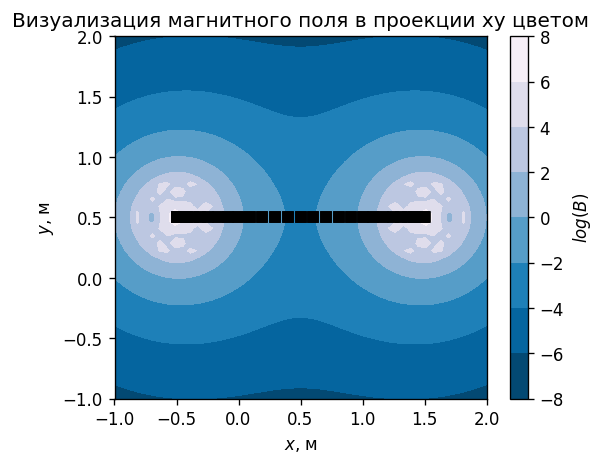

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker, cm


def loop(sides, radius=1, rotation=0, translation = None):
    """ Функция, вычисляющая точки на окружности при равномерном разделении на sides частей. """
    
    one_segment = 2*np.pi/sides
    points = [(np.sin(i*one_segment + rotation)*radius, 0, np.cos(i*one_segment +
               rotation)*radius) for i in range(sides)]
    if translation:
        points = [[sum(pair) for pair in zip(point, translation)] for point in points]
    return points

def pointB(x, y, z, wire, I = 10):
    """ Вычисление абс. величины магнитного поля в точке, созданное кусочком проводника с током.
    x,y,z - для какой точки хотим вычислить поле,
    wire - координаты двух концов проводника с током. """
    
    n0 = 4*np.pi*1e-7
    const= n0*I/(4*np.pi)
    xA, yA, zA = wire[0][0], wire[0][1], wire[0][2]
    xB, yB, zB = wire[1][0], wire[1][1], wire[1][2]
    r1 = ((x-xA)**2+(y-yA)**2+(z-zA)**2)**1/2  # расстояние до первого конца проводника
    r2 = ((x-xB)**2+(y-yB)**2+(z-zB)**2)**1/2  # расстояние до второго конца проводника
    L = np.sqrt((xB-xA)**2+(yB-yA)**2+(zB-zA)**2)  # длина проводника с током
    Cos1 = (r2**2 - r1**2 - L**2)/(2*L*r1)  # по теореме косинусов - угол 
    Cos2 = (r2**2 - r1**2 + L**2)/(2*L*r2)
    Bfield = const*(Cos2-Cos1)/ \
             ((2*r1**2*r2**2+2*r1**2*L**2+2*r2**2*L**2-r1**4-r2**4-L**4)/(2*L))**1/2
    return Bfield

def Bvector(x,y,z,wire, I = 10):
    """ Вычисление вектора магнитного поля в точке. """
    
    xA, yA, zA = wire[0][0], wire[0][1], wire[0][2]
    xB, yB, zB = wire[1][0], wire[1][1], wire[1][2]
    Bfield = pointB(x,y,z,wire, I)
    vx = (yB-yA)*(z-zA) - (y-yA)*(zB-zA)
    vy = (x-xA) *(zB-zA) - (xB-xA)*(z-zA)
    vz = (xB-xA)*(y-yA) - (x-xA)*(yB-yA)
    v = (vx**2+vy**2+vz**2)**1/2
    Bx = Bfield*vx/v
    By = Bfield*vy/v
    Bz = Bfield*vz/v
    return Bx,By,Bz


x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 50)
z = np.linspace(-1, 2, 60)
x, y, z = np.meshgrid(x, y, z)
circle = loop(60, 1, 0, [0.5, 0.5, 0.5])

I = 500

# итерируемся по всему кольцу с током, суммируем вектора магн.поля создаваемые каждым 
# кусочком кольца в каждой точке сетки
Bx, By, Bz = 0, 0, 0
for k in range(len(circle) - 1):
    BX, BY, BZ = Bvector(x, y, z, [circle[k], circle[k+1]], I)
    Bx += BX
    By += BY
    Bz += BZ

fig = plt.figure(figsize=(5,4), dpi=120)
ax = fig.add_subplot(111)
B = (Bx**2+By**2+Bz**2)**1/2

zplane = 30 # z координата для сечения
# визуализируем тепловую карту магнитного поля
cs = ax.contourf(x[:,:,zplane], y[:,:,zplane], np.log10(abs(B[:,:,zplane])), cmap=cm.PuBu_r)
cb = fig.colorbar(cs)

ax.plot(np.array(circle)[:,0], np.array(circle)[:,1], 'sk') # визуализация проекции чёрного кольца
ax.set_xlabel(r"$x$, м")
ax.set_ylabel(r"$y$, м")
ax.set_title("Визуализация магнитного поля в проекции xy цветом")
cb.set_label("$log(B)$")
plt.show()

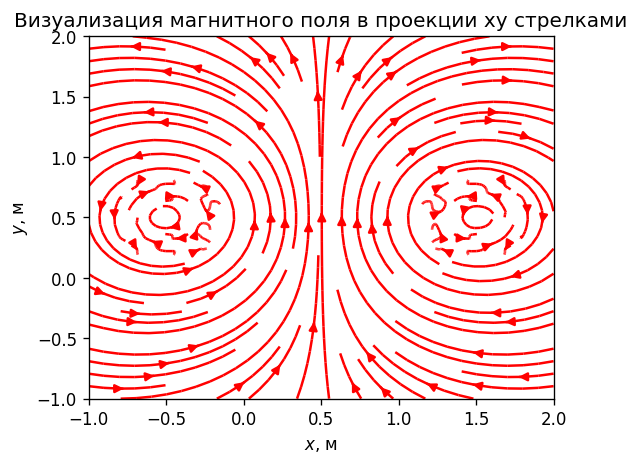

In [2]:
fig = plt.figure(figsize=(5,4), dpi=120)
ax = fig.add_subplot(111)
Bx1 = ((Bx/B))
By1 = ((By/B))
Bz1 = ((Bz/B))

# визуализируем линии потока магнитного поля
ax.streamplot(x[:,:,zplane], y[:,:,zplane], Bx[:,:,zplane], By[:,:,zplane], color='r')
ax.set_xlabel(r"$x$, м")
ax.set_ylabel(r"$y$, м")
ax.set_title("Визуализация магнитного поля в проекции xy стрелками")
cb.set_label("$log(B)$")
plt.show()

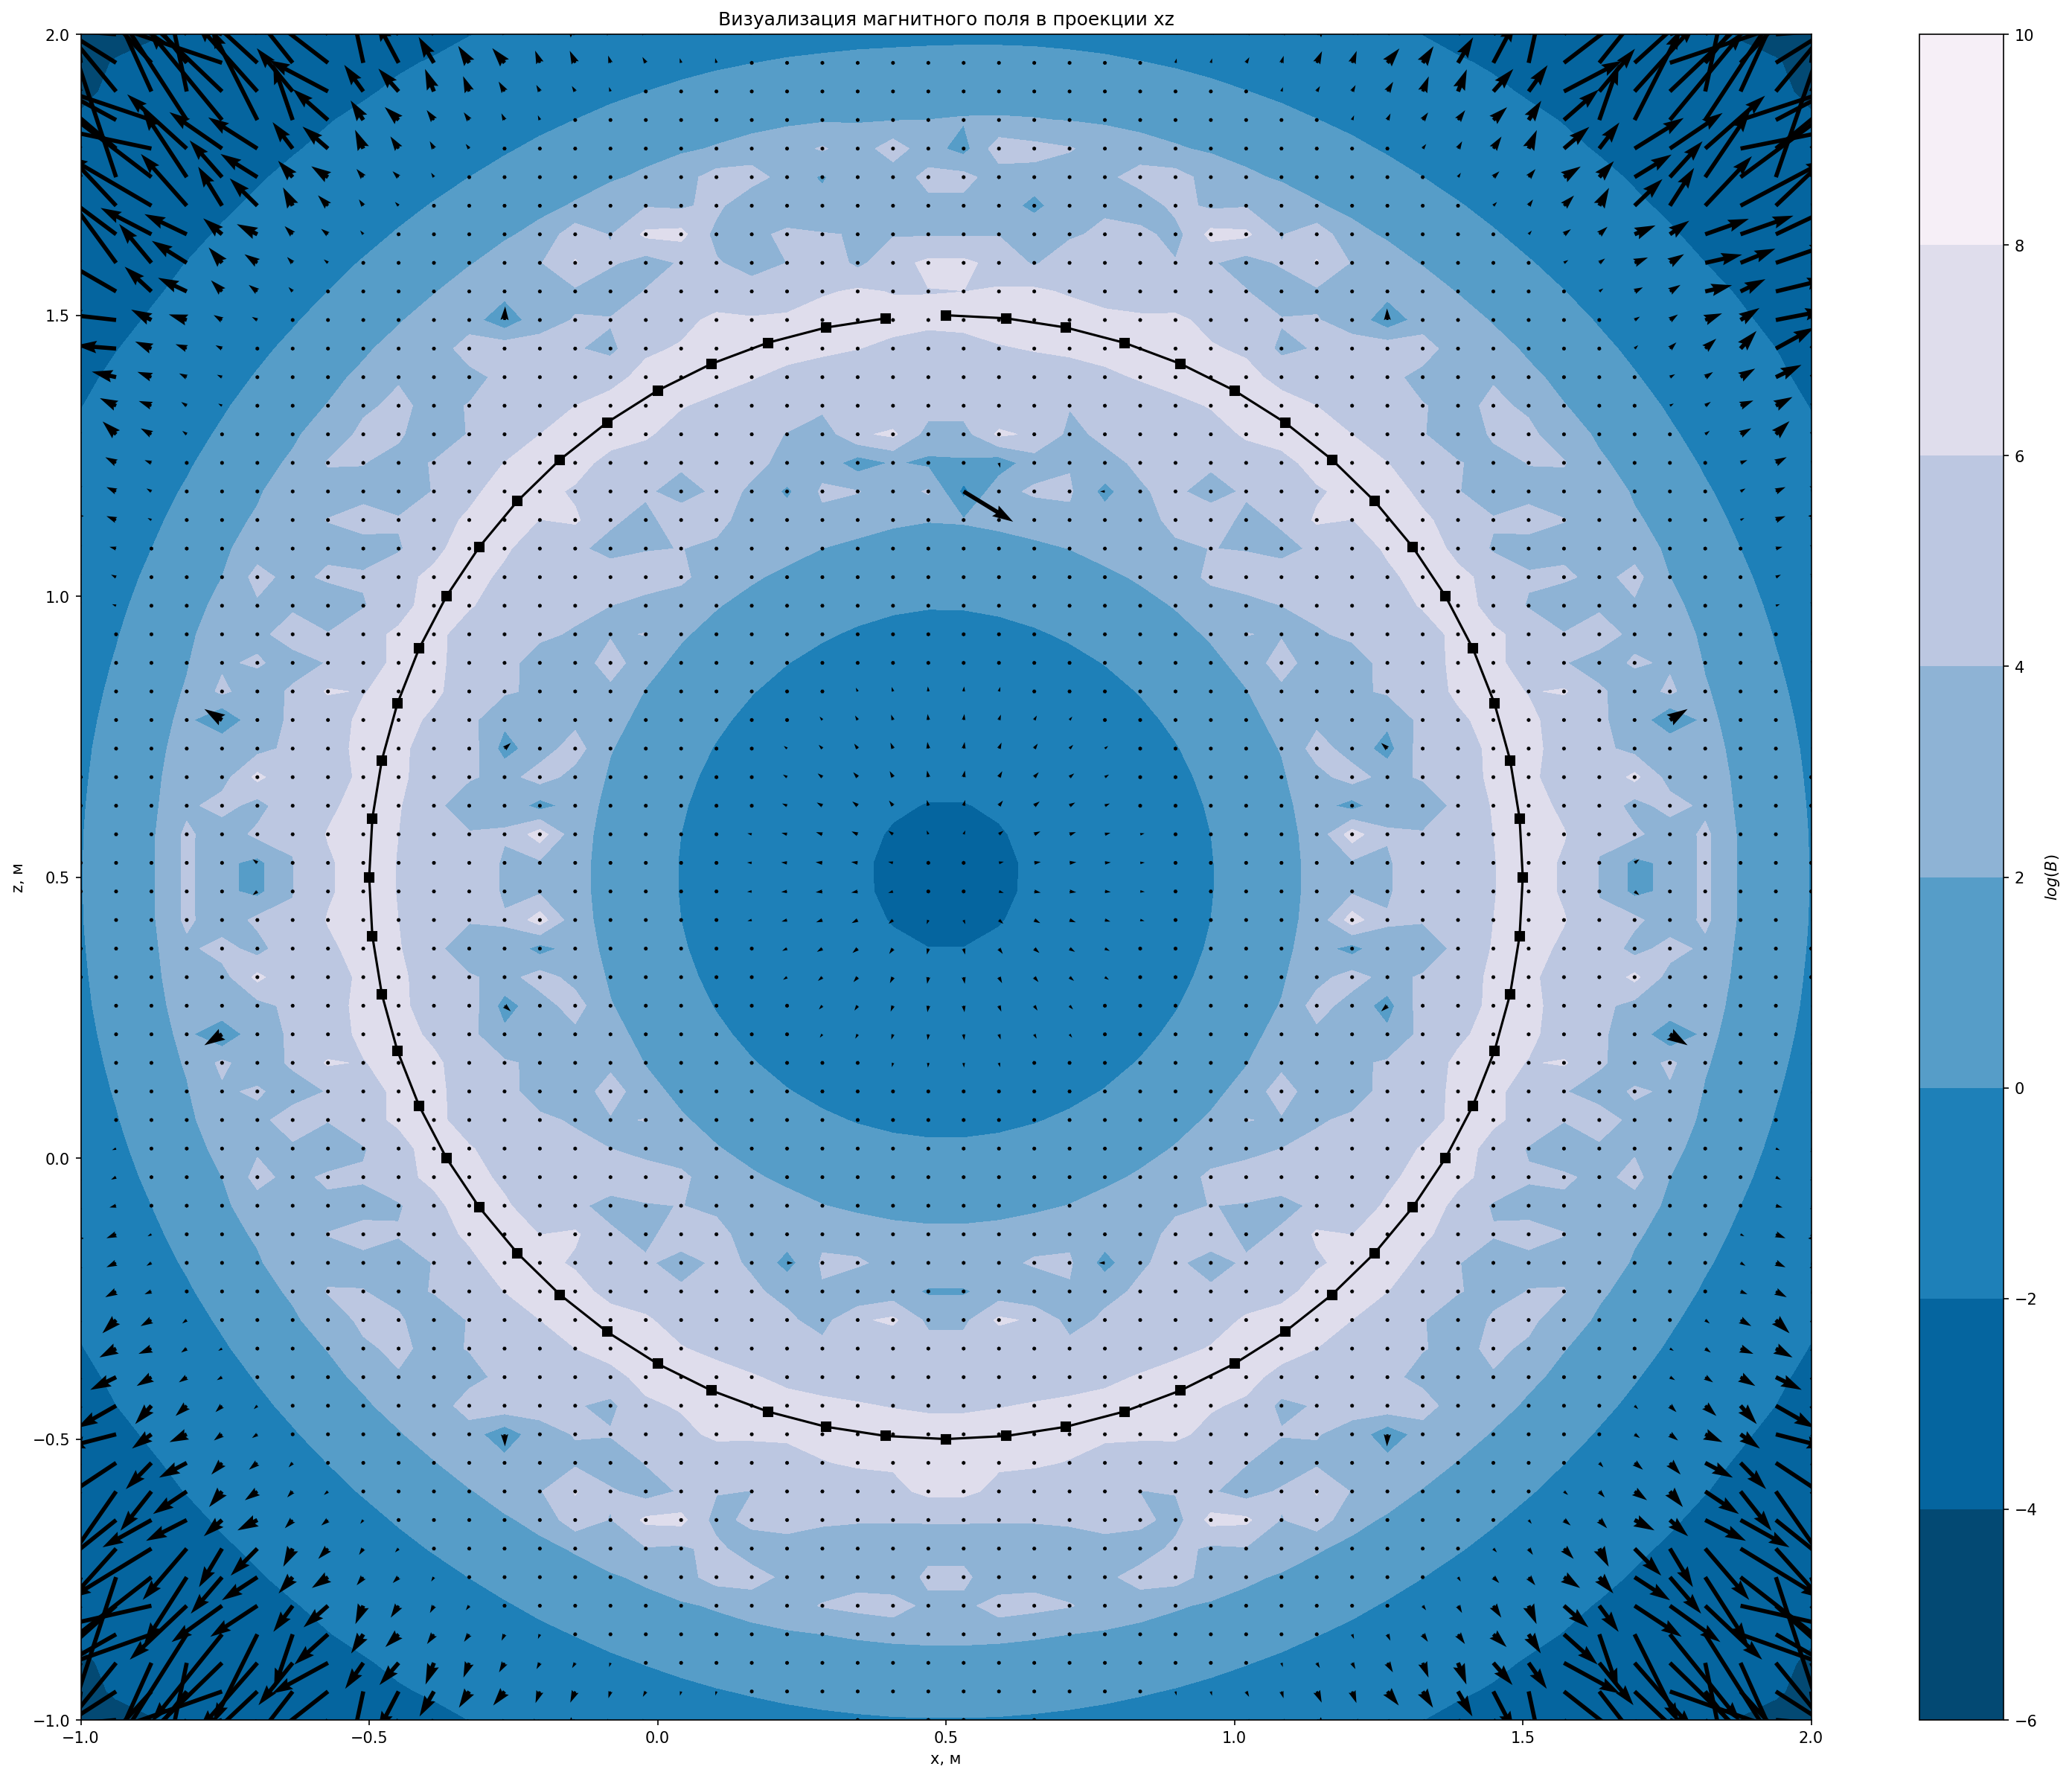

In [3]:
# в другой проекции

fig = plt.figure(figsize=(25,20), dpi=150)
ax = fig.add_subplot(111)
    
yplane=25
cs = ax.contourf(x[yplane,:,:], z[yplane,:,:], np.log10(abs(B[yplane,:,:])), cmap=cm.PuBu_r)
ax.quiver(x[yplane,:,:], z[yplane,:,:], Bx1[yplane,:,:], Bz1[yplane,:,:])
ax.plot(np.array(circle)[:,0], np.array(circle)[:,2], '-sk')
cb = fig.colorbar(cs)
cb.set_label("$log(B)$")
ax.set_title('Визуализация магнитного поля в проекции xz')
ax.set_xlabel(r"x, м")
ax.set_ylabel(r"z, м")
plt.show()